# Classification Case Study  - Whether to grant loan or not

### Import libraries 

In [283]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')
import warnings
warnings.filterwarnings('ignore')

### Load data 

In [284]:
# Read data
df =  pd.read_csv("loans.csv")

In [285]:
df.shape

(614, 13)

In [286]:
# Features in the dataset
df.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

### Understand data 

In [287]:
df.sample(5)

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
546,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,N
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
258,LP001859,Male,Yes,0,Graduate,No,14683,2100.0,304.0,360.0,1.0,Rural,N


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [289]:
df.LoanAmountTerm.value_counts()

LoanAmountTerm
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [290]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'LoanAmountTerm']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [291]:
df[['Gender','Married','Dependents','Education','SelfEmployed','PropertyArea']].describe(include='all')

,Gender,Married,Dependents,Education,SelfEmployed,PropertyArea
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


In [292]:
df.isnull().sum()  # Count no. of null values for each column

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [293]:
df['LoanStatus'].value_counts()

LoanStatus
Y    422
N    192
Name: count, dtype: int64

In [294]:
# Normalize can be set to True to print proportions instead of number 
df['LoanStatus'].value_counts(normalize=True)

LoanStatus
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='LoanStatus', ylabel='count'>

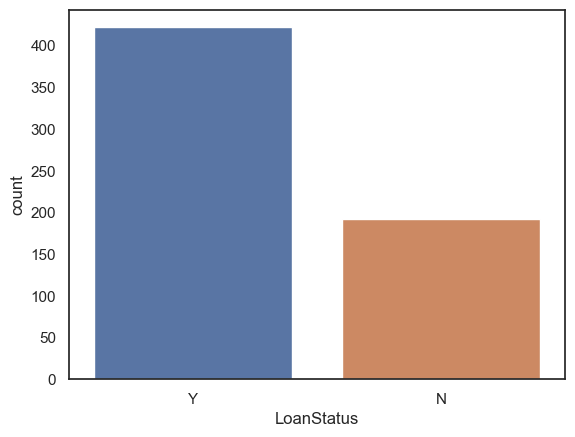

In [295]:
# Bar graph for loan_status
sns.countplot(x="LoanStatus", data=df)

In [296]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

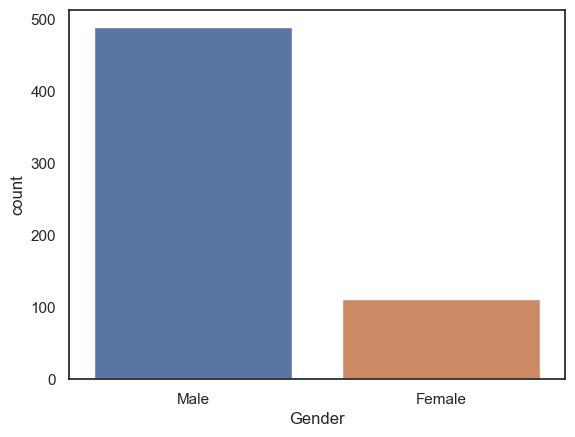

In [297]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=df)

In [298]:
df['Dependents'].fillna('NA').value_counts()

Dependents
0     345
1     102
2     101
3+     51
NA     15
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

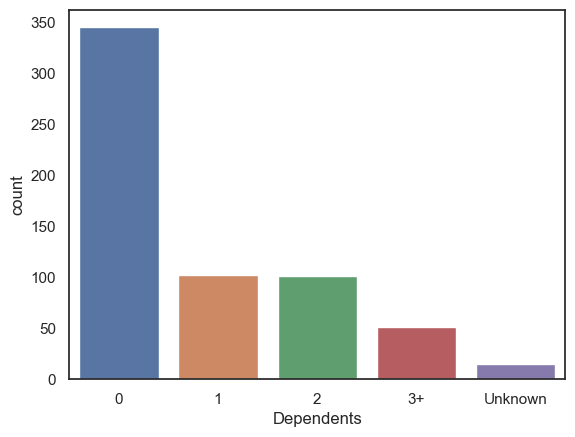

In [299]:
# Bar graph for dependents 
sns.countplot(x = df['Dependents'].fillna('Unknown'))

In [300]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

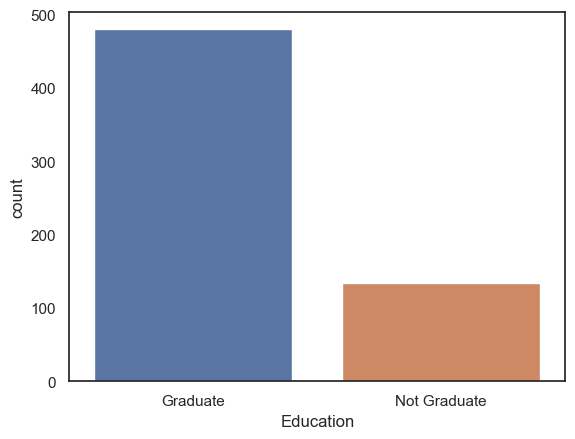

In [301]:
sns.countplot(x = "Education", data=df)

In [302]:
df['SelfEmployed'].value_counts()

SelfEmployed
No     500
Yes     82
Name: count, dtype: int64

<Axes: xlabel='SelfEmployed', ylabel='count'>

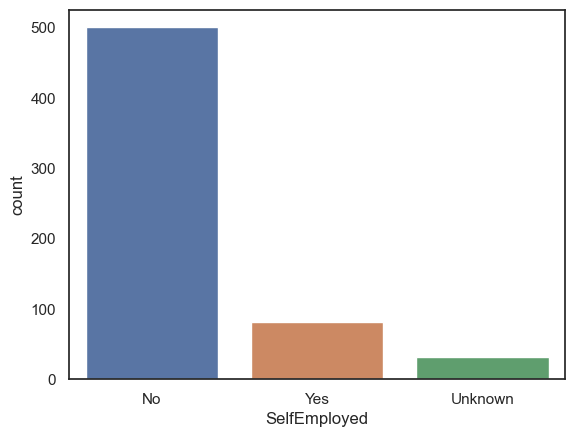

In [303]:
# Bar graph of SelfEmployed
sns.countplot(x= df['SelfEmployed'].fillna('Unknown'))

In [304]:
df.CreditHistory.fillna('Unknown').value_counts()

CreditHistory
1.0        475
0.0         89
Unknown     50
Name: count, dtype: int64

<Axes: xlabel='CreditHistory', ylabel='count'>

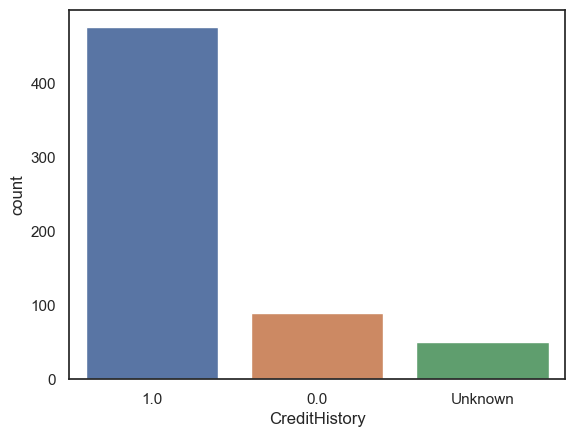

In [305]:
# Bar graph of Credit_History
sns.countplot(x = df.CreditHistory.fillna('Unknown'))

In [306]:
df['CreditHistory'].fillna('Unknown').value_counts(normalize=True)

CreditHistory
1.0        0.773616
0.0        0.144951
Unknown    0.081433
Name: proportion, dtype: float64

In [307]:
df['PropertyArea'].fillna('Unknown').value_counts()

PropertyArea
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: xlabel='PropertyArea', ylabel='count'>

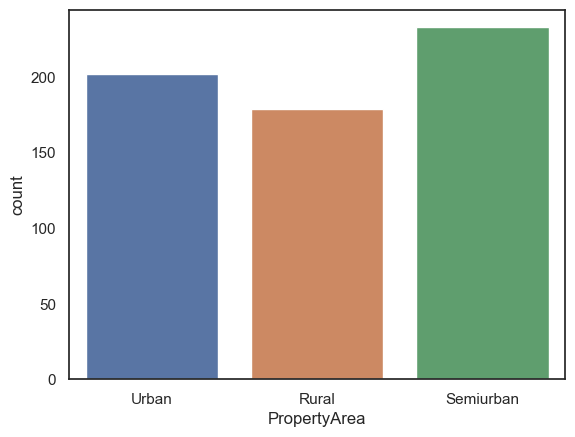

In [308]:
# Bar graph of Property_Area
sns.countplot(x='PropertyArea',data=df)

<Axes: xlabel='Married', ylabel='count'>

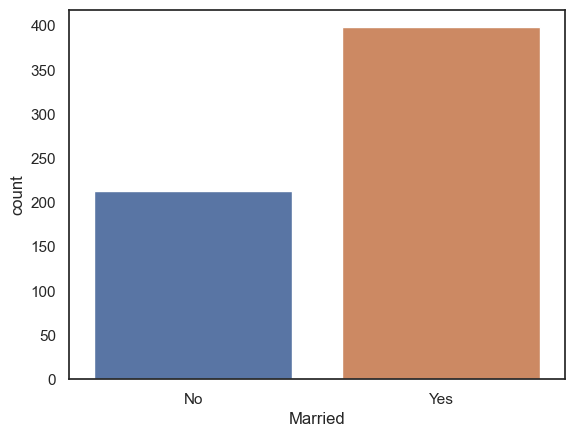

In [309]:
# Bar Graph for Married
sns.countplot(x="Married",data=df)

In [310]:
df.pivot_table(columns="Married",index="Dependents", values="LoanID", aggfunc=len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [311]:
print(df['SelfEmployed'].isnull().sum())   # Missing count 
print(df['Gender'].isnull().sum())   # Missing count 
print(df['Married'].isnull().sum())   # Missing count 
print(df['CreditHistory'].isnull().sum())   # Missing count 
print(df['Dependents'].isnull().sum())   # Missing count 

32
13
3
50
15


###  Univariate Analysis for Continous Variables 

<Axes: >

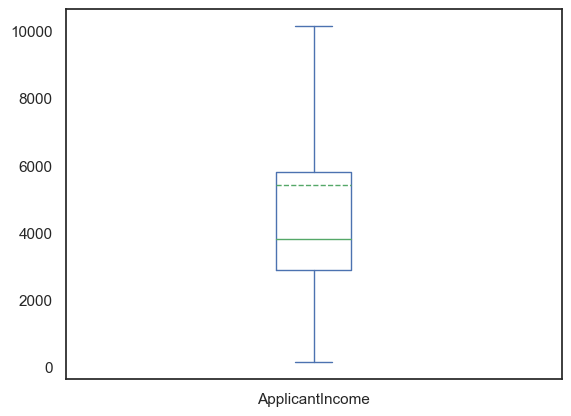

In [312]:
# Visualizing numerical features
#plt.gcf().set_size_inches(5,8)
df.ApplicantIncome.plot.box(showfliers=False, meanline=True, showmeans = True)
# sns.boxplot(x="ApplicantIncome",data=df, orient='vertical', showfliers=False, meanline=True, showmeans=True)

#### Display how many outliers in ApplicantIncome 

In [313]:
app_income = df["ApplicantIncome"]

In [314]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [315]:
iqr = q3 - q1

In [316]:
iqr

2917.5

In [317]:
print("Upper Limit     : ", (q3 + 1.5 * iqr))
print("Lower Limit     : ", (q1 - 1.5 * iqr))
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Upper Limit     :  10171.25
Lower Limit     :  -1498.75
Higher outliers :  50
Lower  outliers :  0


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

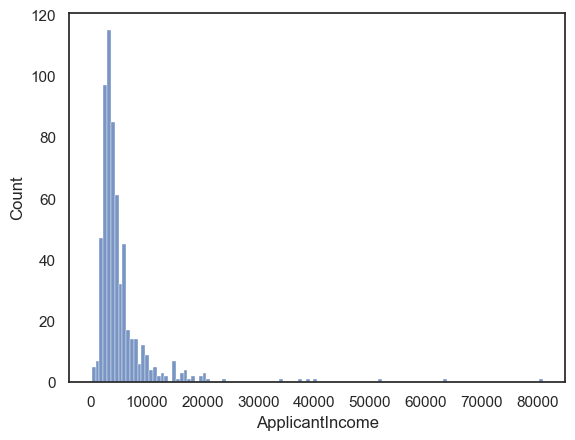

In [318]:
sns.histplot(df.ApplicantIncome)

In [319]:
np.log(100), np.log(10000)   # Log Transformation

(4.605170185988092, 9.210340371976184)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

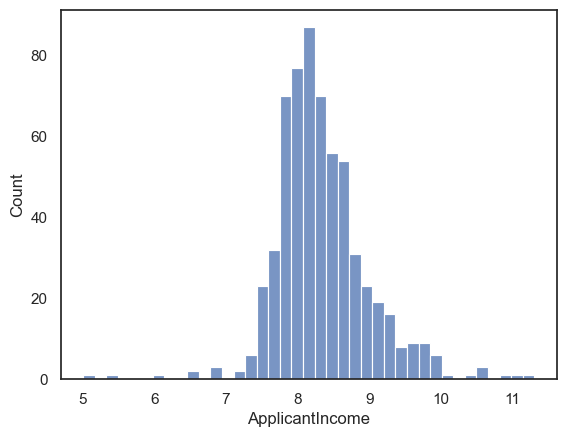

In [320]:
sns.histplot(np.log(df.ApplicantIncome))  # After log transformation 

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

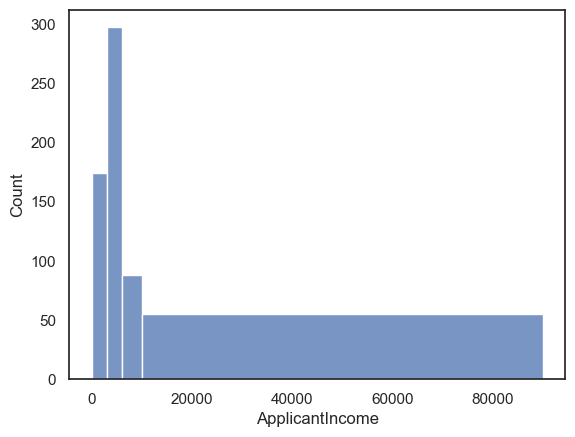

In [321]:
sns.histplot(df["ApplicantIncome"],bins=[0,3000,6000,10000,90000])    # Histogram
# plt.gcf().set_size_inches(10,5)

<Axes: >

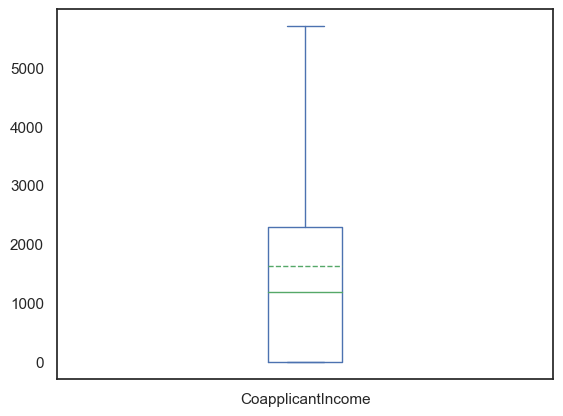

In [322]:
df.CoapplicantIncome.plot.box(showmeans=True, meanline=True, showfliers = False)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

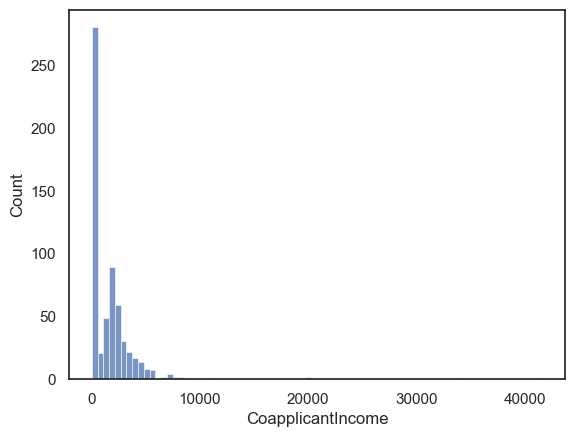

In [323]:
sns.histplot(df.CoapplicantIncome)

<Axes: xlabel='LoanAmount', ylabel='Count'>

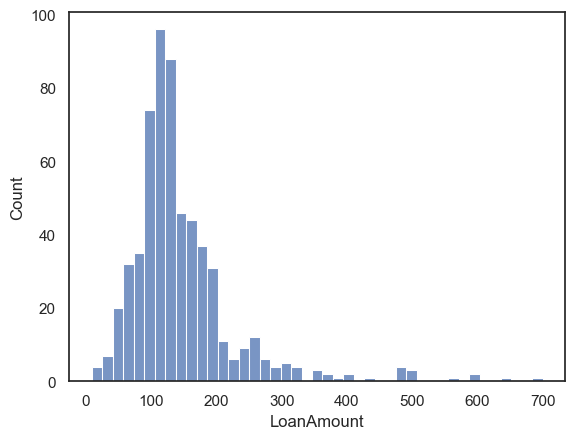

In [324]:
sns.histplot(df.LoanAmount)

<Axes: xlabel='LoanAmount', ylabel='Count'>

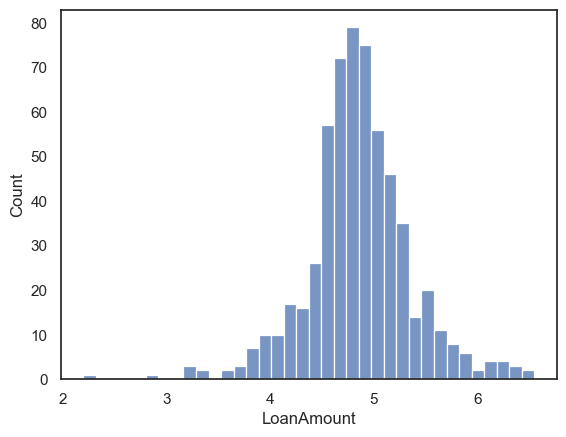

In [325]:
sns.histplot(np.log(df.LoanAmount))  # After log transformation 

<Axes: >

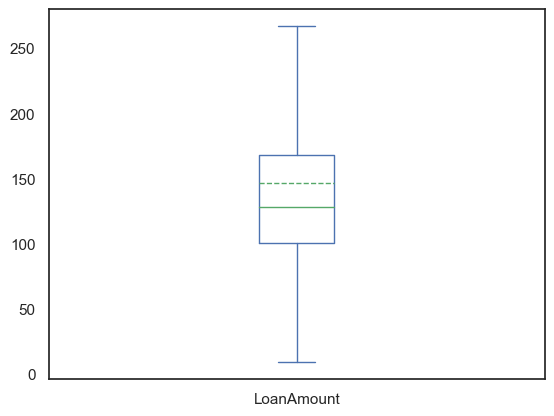

In [326]:
df.LoanAmount.plot.box(showfliers=False, meanline=True, showmeans= True)
#plt.gcf().set_size_inches(20,8)

<Axes: xlabel='LoanAmount', ylabel='Count'>

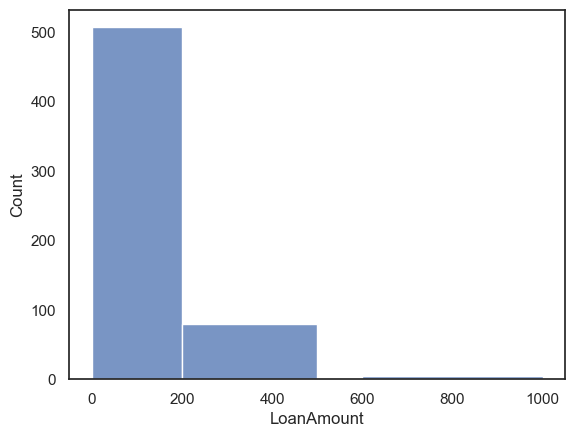

In [327]:
sns.histplot(df['LoanAmount'], bins=[0,200,500,600,1000])

<Axes: xlabel='LoanAmountTerm', ylabel='Count'>

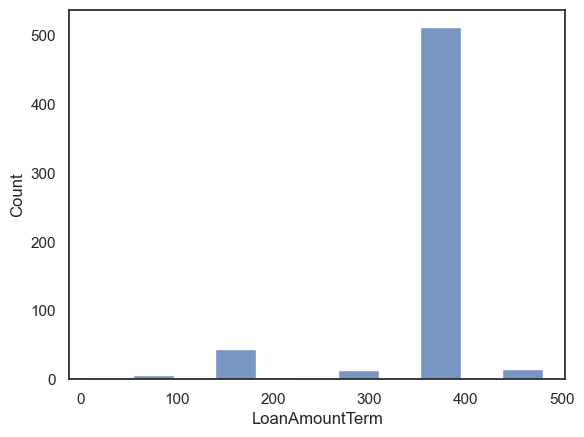

In [328]:
sns.histplot(df["LoanAmountTerm"])

In [329]:
# Convert months to years and displays dist
(df.LoanAmountTerm / 12).value_counts().sort_index()

LoanAmountTerm
1.0       1
3.0       2
5.0       2
7.0       4
10.0      3
15.0     44
20.0      4
25.0     13
30.0    512
40.0     15
Name: count, dtype: int64

##  Bivariate Analysis

In [330]:
property_group = df.pivot_table(index='PropertyArea',columns="LoanStatus", values='LoanID',aggfunc=len)

In [331]:
property_group

LoanStatus,N,Y
PropertyArea,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [332]:
df.PropertyArea.value_counts()

PropertyArea
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [333]:
# Rejection rate 
property_group.iloc[:,0] / (property_group.iloc[:,0] + property_group.iloc[:,1])

PropertyArea
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

In [334]:
# Acceptance rate 
property_group.iloc[:,1] / (property_group.iloc[:,0] + property_group.iloc[:,1])

PropertyArea
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
dtype: float64

In [335]:
df.groupby(['PropertyArea','LoanStatus'])['LoanID'].count()

PropertyArea  LoanStatus
Rural         N              69
              Y             110
Semiurban     N              54
              Y             179
Urban         N              69
              Y             133
Name: LoanID, dtype: int64

In [336]:
df.groupby(['Gender','Education'], as_index=False)['ApplicantIncome'].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


<Axes: xlabel='Married', ylabel='count'>

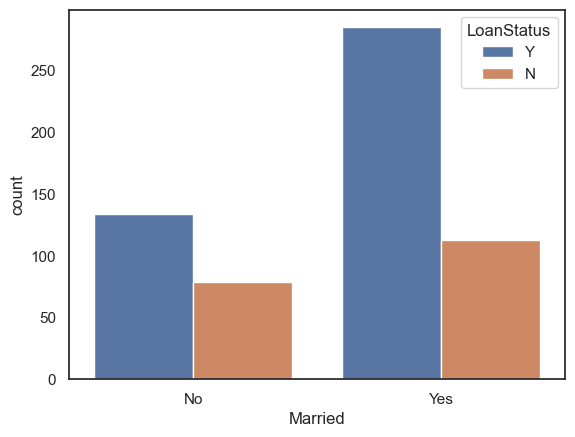

In [337]:
# d = df.groupby(by=["LoanStatus","Married"], as_index=False)['LoanID'].count()
# print(d)
# sns.catplot(x="Married",y="LoanID", hue="LoanStatus", data=d, kind="bar")
sns.countplot(x="Married", data = df, hue="LoanStatus")

In [338]:
df.pivot_table(index = "Married", columns="LoanStatus", values='LoanID',aggfunc=len)

LoanStatus,N,Y
Married,,
No,79,134
Yes,113,285


In [339]:
# Married vs. Unmarried rejection rates
(113 / (285 + 113)), (79 / (79 + 134))

(0.28391959798994976, 0.37089201877934275)

<Axes: xlabel='Dependents', ylabel='count'>

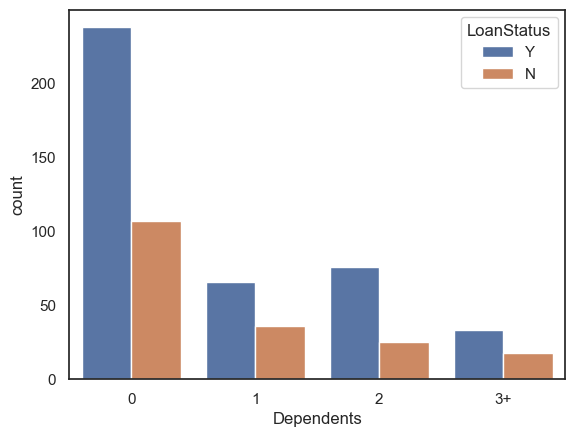

In [340]:
# d = df.groupby(by=["LoanStatus","Dependents"], as_index=False)['LoanID'].count()
# print(d)
sns.countplot(x="Dependents", hue="LoanStatus", data=df)

In [341]:
#d = df.groupby(by=["LoanStatus","Education"], as_index=False)['LoanID'].count()
#sns.catplot(x="Education",y="LoanID", hue="LoanStatus", data=d, kind="bar")

  LoanStatus SelfEmployed  LoanID
0          N           No     157
1          N          Yes      26
2          Y           No     343
3          Y          Yes      56


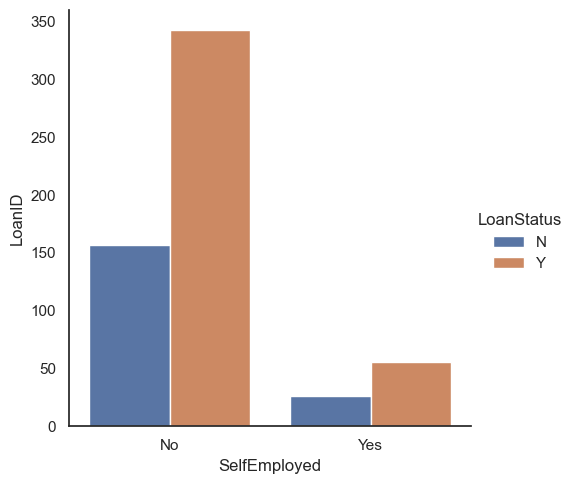

In [342]:
d = df.groupby(by=["LoanStatus","SelfEmployed"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="SelfEmployed",y="LoanID", hue="LoanStatus", data=d, kind="bar")

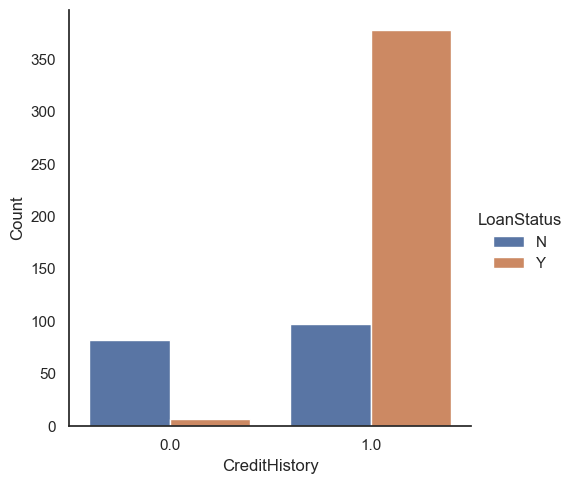

In [343]:
d = df.groupby(by=["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
sns.catplot(x="CreditHistory",y="Count", hue="LoanStatus", data=d, kind="bar")

  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


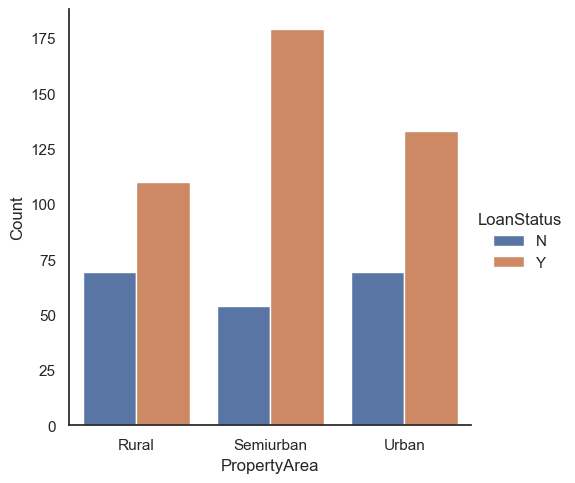

In [344]:
d = df.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="PropertyArea",y="Count", hue="LoanStatus", data=d, kind='bar')

  LoanStatus  Gender  LoanID
0          N  Female      37
1          N    Male     150
2          Y  Female      75
3          Y    Male     339


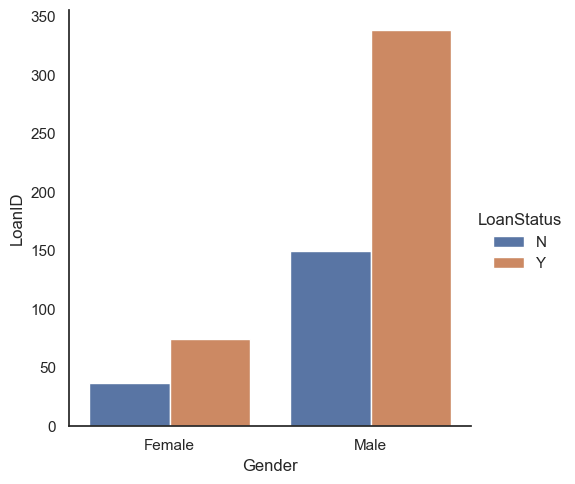

In [345]:
d = df.groupby(by=["LoanStatus","Gender"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="Gender",y="LoanID", hue="LoanStatus", data=d, kind="bar")

In [346]:
37/75, 150/339   # Rejection rate based on gender 

(0.49333333333333335, 0.4424778761061947)

### Binning data

In [347]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']
# Create a new column for income bin  
df['IncomeBin']= pd.cut(df['ApplicantIncome'],bins,labels=group)

In [348]:
df[['ApplicantIncome','IncomeBin']].sample(10)

,ApplicantIncome,IncomeBin
129,6080,Very high
272,2833,Average
221,4009,High
503,4050,High
333,63337,Very high
567,3400,Average
494,3597,Average
250,1668,Low
240,5819,High
329,2500,Low


<Axes: xlabel='IncomeBin', ylabel='count'>

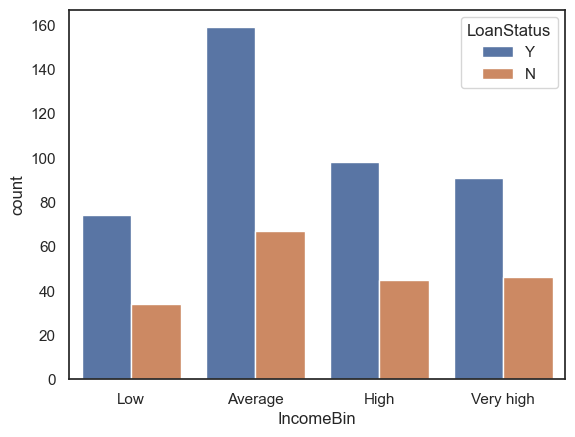

In [349]:
sns.countplot(x="IncomeBin", hue="LoanStatus", data=df)

In [350]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmountBin']=pd.cut(df['LoanAmount'],bins,labels=group)
df[['LoanAmount','LoanAmountBin']].head(10)

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


<Axes: xlabel='LoanAmountBin', ylabel='count'>

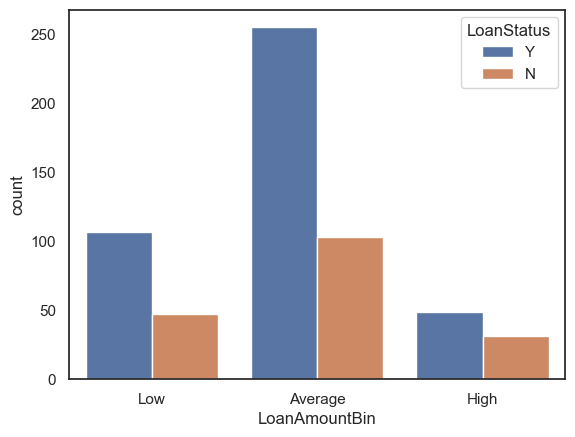

In [351]:
sns.countplot(x="LoanAmountBin", hue="LoanStatus", data=df)

### Bivariate for continuous variables 

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

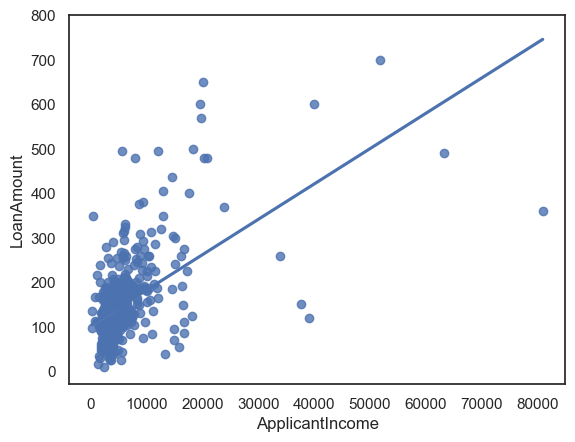

In [352]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = df,ci=False)

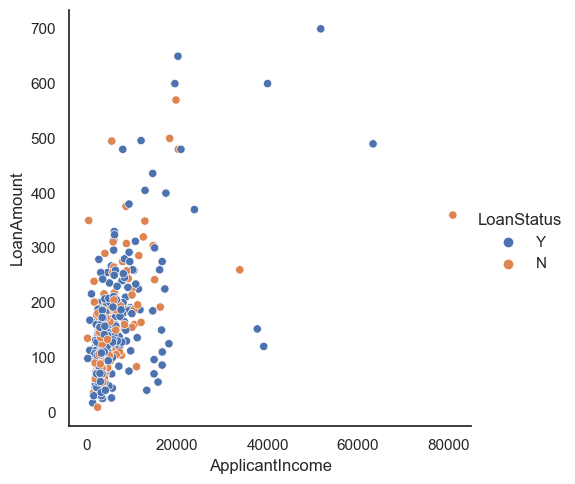

In [353]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus', data = df)

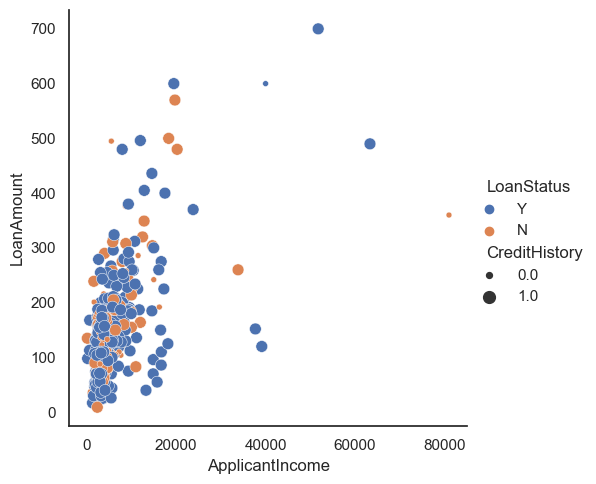

In [354]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus', size="CreditHistory", data = df)

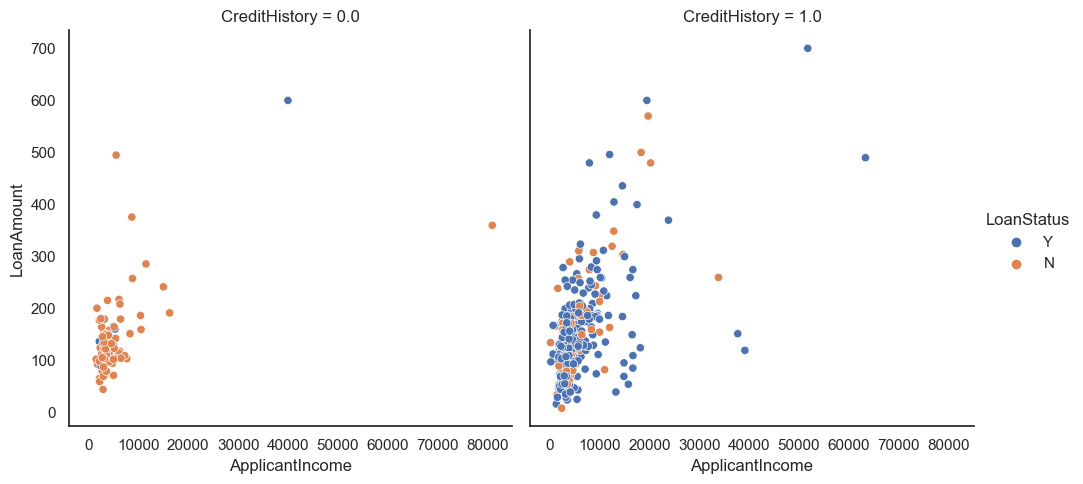

In [355]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus',col='CreditHistory',data = df)

####  Take CoApplicantIncome and compare with loan amount and Gender

In [356]:
df.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'IncomeBin', 'LoanAmountBin'],
      dtype='object')

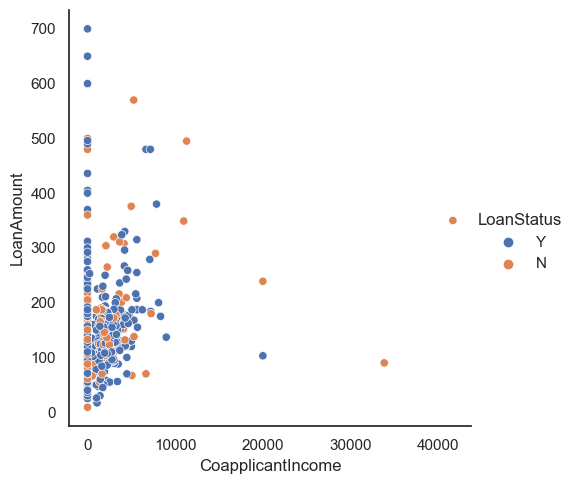

In [357]:
sns.relplot(x="CoapplicantIncome", y = "LoanAmount", hue='LoanStatus',data = df)

## Data Wrangling 

In [358]:
# Drop the new variable of bins
df.drop(['IncomeBin', 'LoanAmountBin'], axis=1, inplace=True)

#### Dependents 

In [359]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [360]:
# replacing 3+ in Dependents variable with 3
df['Dependents'].replace(to_replace ='3+', value='3',inplace=True)

In [361]:
df['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

#### Loan_Status

In [362]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df['LoanStatus'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

### Missing value and outlier treatment

In [363]:
# Checking the missing values
s = df.isnull().sum()
s [ s > 0]

Gender            13
Married            3
Dependents        15
SelfEmployed      32
LoanAmount        22
LoanAmountTerm    14
CreditHistory     50
dtype: int64

In [364]:
# replacing the missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [365]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['SelfEmployed'].fillna(df['SelfEmployed'].mode()[0], inplace=True)

In [366]:
# Drop rows where credit history is null 
df = df[df.CreditHistory.notnull()]

In [367]:
df.shape

(564, 13)

In [368]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [369]:
df['LoanAmountTerm'].fillna(df['LoanAmountTerm'].mode()[0], inplace=True)

In [370]:
df.LoanAmount.median(), df.LoanAmount.mean()

(127.0, 145.08839779005524)

In [371]:
# Replace missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [282]:
df.isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
SelfEmployed      0
LoanAmountTerm    0
CreditHistory     0
PropertyArea      0
LoanStatus        0
LoanAmountLog     0
IncomeLog         0
dtype: int64

### Handle outliers in LoanAmount, ApplicantIncome, CoApplicantIncome 

In [372]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<Axes: >

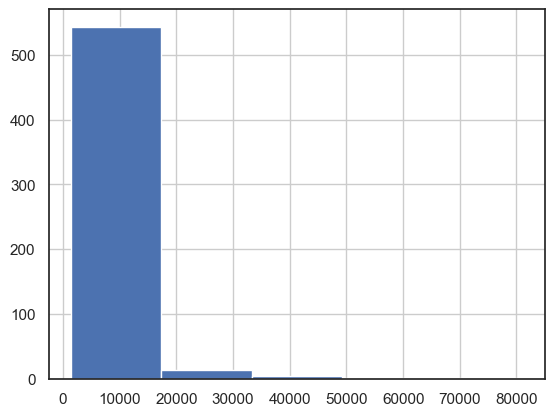

In [373]:
df['Income'].hist(bins=5)

<Axes: xlabel='Income', ylabel='Count'>

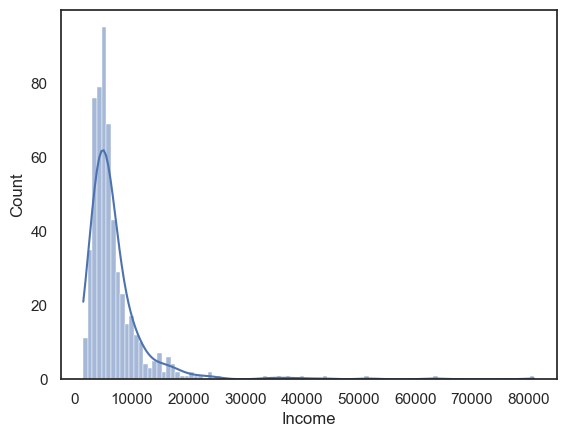

In [374]:
sns.histplot(data = df['Income'], kde=True)

<Axes: >

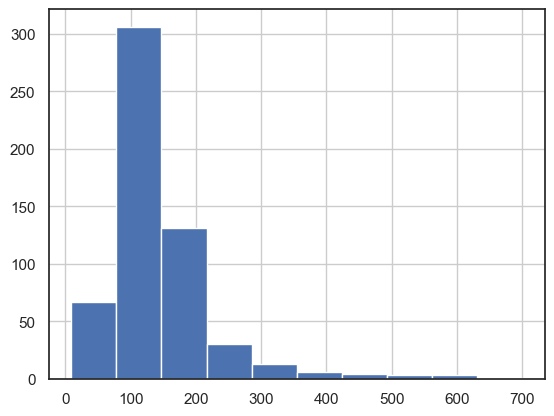

In [375]:
df['LoanAmount'].hist(bins=10)

<Axes: >

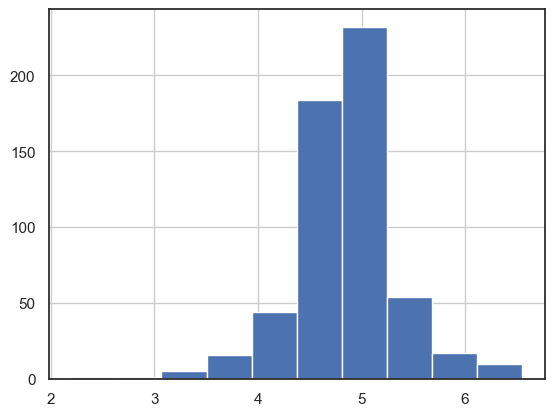

In [376]:
# Removing skewness in LoanAmount variable by log transformation
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['LoanAmountLog'].hist(bins=10)

<Axes: >

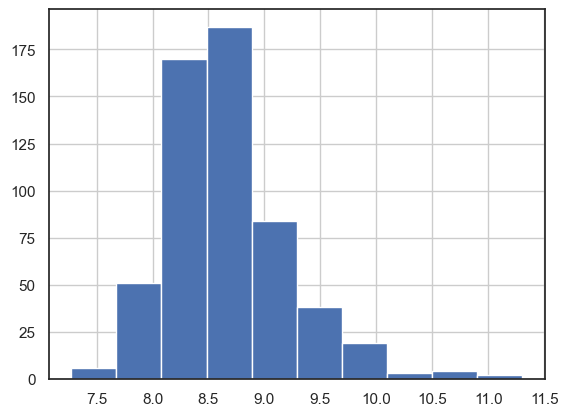

In [377]:
# Removing skewness in Income variable by log transformation
df['IncomeLog'] = np.log(df['Income'])
df['IncomeLog'].hist(bins=10)

In [378]:
df.drop(['LoanID','LoanAmount','ApplicantIncome','CoapplicantIncome','Income'],axis=1,inplace=True)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          564 non-null    object 
 1   Married         564 non-null    object 
 2   Dependents      564 non-null    object 
 3   Education       564 non-null    object 
 4   SelfEmployed    564 non-null    object 
 5   LoanAmountTerm  564 non-null    float64
 6   CreditHistory   564 non-null    float64
 7   PropertyArea    564 non-null    object 
 8   LoanStatus      564 non-null    int64  
 9   LoanAmountLog   564 non-null    float64
 10  IncomeLog       564 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


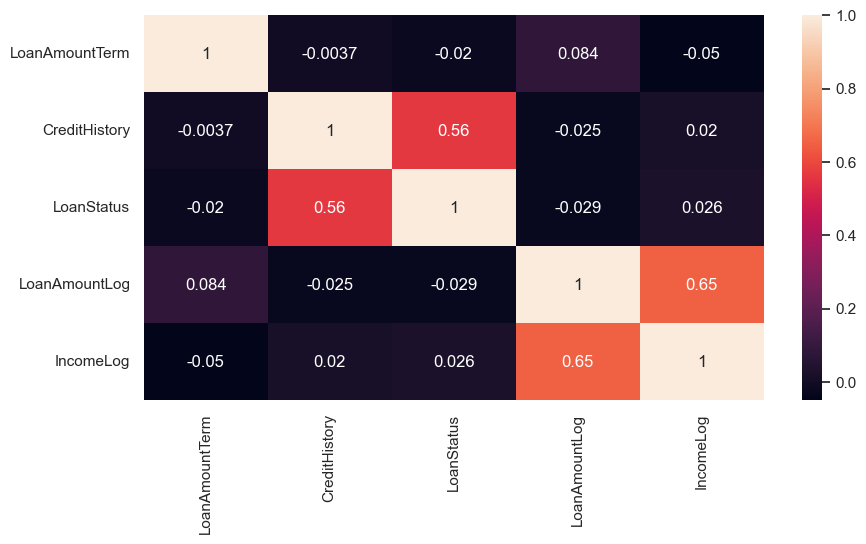

In [381]:
# Print correlation matrix to understand relationship between variables
matrix = df.corr( numeric_only = True)
# print(matrix)
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(10,5)

In [382]:
# Save dataframe
df.to_csv("final_df.csv",index=False)